# Smart Portfolio Engineering & Quant Finance with Python

## Title & Context
This hands-on lab introduces **Modern Portfolio Theory (MPT)**, a cornerstone of quantitative finance developed by Harry Markowitz. MPT shows how to construct optimal portfolios by balancing expected return (μ) against risk (σ, measured as volatility). Through diversification across assets with different correlations, we can reduce overall portfolio risk without necessarily sacrificing returns.

We will use real market data to build and visualize the **Efficient Frontier** — the set of portfolios offering the highest expected return for a given level of risk — and identify the portfolio with the maximum **Sharpe Ratio** (best risk-adjusted return).

## Problem Statement
Given historical price data for a diversified set of assets (stocks, ETFs representing equities, gold, and bonds), compute daily returns, annualize expected returns and risks, generate thousands of random portfolio allocations, and plot the Efficient Frontier. Finally, use optimization to find the portfolio weights that maximize the Sharpe Ratio.

## Objective (What the Model/Session Will Achieve)
By the end of this lab, you will:
- Understand the fundamentals of risk (σ) and return (μ) in portfolio construction.
- See how diversification improves stability and reduces portfolio-level risk.
- Apply MPT to construct optimal asset allocations.
- Build and interpret the Efficient Frontier using real data.
- Compute and compare Sharpe Ratios to select the best-performing risk-adjusted portfolio.
- **Explicitly compare performance before (single assets / equal-weighted) vs. after (optimized) diversification.**

## Tools & Purpose
- **yfinance**: Download historical adjusted closing prices from Yahoo Finance.
- **pandas & numpy**: Data manipulation, returns calculation, and statistical computations.
- **matplotlib**: Visualization of the Efficient Frontier and optimal portfolios.
- **scipy.optimize**: Find the portfolio weights that maximize the Sharpe Ratio.

## What We’ll Do in the Lab
- Download 5 years of real market data
- Compute returns and annualized statistics
- Evaluate individual assets (no diversification)
- Simulate random portfolios to trace the Efficient Frontier
- Optimize for the maximum Sharpe Ratio portfolio
- **Compare performance: single assets → equal-weighted → optimized diversified**

Now let's start coding! Run each cell sequentially.

In [7]:
# Install yfinance (safe to run in Colab or Jupyter)
%pip install yfinance --quiet

Note: you may need to restart the kernel to use updated packages.


### Explanation: Installing yfinance
This installs the `yfinance` library to download historical market data from Yahoo Finance. The `--quiet` flag keeps output minimal.

In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

print("Libraries imported successfully!")

Libraries imported successfully!


### Explanation: Importing Libraries
We import all required packages:
- `yfinance` for data
- `pandas`, `numpy` for calculations
- `matplotlib` for plots
- `scipy.optimize` for portfolio optimization

In [2]:
# Define diversified asset tickers
tickers = ['SPY', 'GLD', 'BND', 'AAPL', 'MSFT']

# Download 5 years of adjusted closing prices
data = yf.download(tickers, period='5y')['Close']

print("Historical Adjusted Close Prices (head and tail):")
display(data.head())
display(data.tail())

/var/folders/k8/yz4ntyh10x54tzl39hdzq83h0000gn/T/ipykernel_18989/666892420.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='5y')['Close']
[*********************100%***********************]  5 of 5 completed

Historical Adjusted Close Prices (head and tail):


Ticker,AAPL,BND,GLD,MSFT,SPY
Date,,,,,
2020-12-21,124.825768,75.412720,175.880005,213.583923,343.388641
2020-12-22,128.378876,75.532524,174.490005,214.879333,342.809814
2020-12-23,127.483337,75.447510,175.649994,212.077469,343.117950
2020-12-24,128.466522,75.576340,176.350006,213.737503,344.452820
2020-12-28,133.061203,75.550560,175.710007,215.858124,347.411926


Ticker,AAPL,BND,GLD,MSFT,SPY
Date,,,,,
2025-12-15,274.109985,73.873398,395.799988,474.820007,678.724426
2025-12-16,274.609985,74.012932,395.890015,476.390015,676.869934
2025-12-17,271.839996,73.992996,399.290009,476.119995,669.421936
2025-12-18,272.190002,74.150002,398.570007,483.980011,674.476929
2025-12-19,273.670013,74.040001,399.019989,485.920013,680.590027


### Explanation: Downloading Historical Data
We select five diversified assets:
- **SPY**: S&P 500 (broad US stocks)
- **GLD**: Gold (commodity hedge)
- **BND**: US bonds (fixed income)
- **AAPL**, **MSFT**: Tech giants

We download **5 years** of daily adjusted closing prices.

In [3]:
# Compute daily returns
daily_returns = data.pct_change().dropna()

print("Daily Returns (first few rows):")
display(daily_returns.head())

Daily Returns (first few rows):


Ticker,AAPL,BND,GLD,MSFT,SPY
Date,,,,,
2020-12-22,0.028465,0.001589,-0.007903,0.006065,-0.001686
2020-12-23,-0.006976,-0.001126,0.006648,-0.013039,0.000899
2020-12-24,0.007712,0.001708,0.003985,0.007827,0.003890
2020-12-28,0.035766,-0.000341,-0.003629,0.009922,0.008591
2020-12-29,-0.013315,0.000341,0.003642,-0.003601,-0.001908


### Explanation: Calculating Daily Returns
Daily returns = percentage change in price. We drop the first NaN row.

In [4]:
# Annualized mean returns and covariance matrix (252 trading days)
mean_daily_returns = daily_returns.mean()
annual_returns = mean_daily_returns * 252

cov_matrix_annual = daily_returns.cov() * 252

num_assets = len(tickers)

print("Annualized Expected Returns:")
print(annual_returns)
print("\nAnnualized Covariance Matrix:")
print(cov_matrix_annual)

Annualized Expected Returns:
Ticker
AAPL    0.196535
BND    -0.001888
GLD     0.176520
MSFT    0.198136
SPY     0.152005
dtype: float64

Annualized Covariance Matrix:
Ticker      AAPL       BND       GLD      MSFT       SPY
Ticker                                                  
AAPL    0.078155  0.002825  0.002915  0.045633  0.036235
BND     0.002825  0.003605  0.003096  0.002333  0.001932
GLD     0.002915  0.003096  0.023935  0.002686  0.003211
MSFT    0.045633  0.002333  0.002686  0.066251  0.033411
SPY     0.036235  0.001932  0.003211  0.033411  0.029289


### Explanation: Annualizing Statistics
We convert daily metrics to annual:
- Expected return × 252
- Covariance × 252

These are standard inputs for MPT.

In [5]:
# Portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

### Explanation: Performance Calculator
This function computes:
- Annual return
- Annual volatility (risk)
- Sharpe Ratio (risk-adjusted return)

In [6]:
# === BEFORE DIVERSIFICATION: Individual Assets Performance ===
print("\n=== Performance of Individual Assets (No Diversification) ===")
individual_performance = []

for i, ticker in enumerate(tickers):
    weights = np.zeros(num_assets)
    weights[i] = 1.0
    ret, vol, sharpe = portfolio_performance(weights, annual_returns, cov_matrix_annual)
    individual_performance.append((ticker, ret, vol, sharpe))
    print(f"{ticker:5} | Return: {ret:.3f} | Volatility: {vol:.3f} | Sharpe: {sharpe:.3f}")

# Best single asset
best_single = max(individual_performance, key=lambda x: x[3])
print(f"\nBest single asset by Sharpe: {best_single[0]} (Sharpe: {best_single[3]:.3f})")


=== Performance of Individual Assets (No Diversification) ===
SPY   | Return: 0.197 | Volatility: 0.280 | Sharpe: 0.631
GLD   | Return: -0.002 | Volatility: 0.060 | Sharpe: -0.365
BND   | Return: 0.177 | Volatility: 0.155 | Sharpe: 1.012
AAPL  | Return: 0.198 | Volatility: 0.257 | Sharpe: 0.692
MSFT  | Return: 0.152 | Volatility: 0.171 | Sharpe: 0.771

Best single asset by Sharpe: BND (Sharpe: 1.012)


### Explanation: Before Diversification – Single Assets
We evaluate each asset in isolation (100% allocation).  
This represents **no diversification** — highest concentration risk.  
We identify the best-performing single asset by Sharpe Ratio.

In [7]:
# Monte Carlo simulation for Efficient Frontier
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  # return, vol, sharpe
weights_record = []

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)

    ret, vol, sharpe = portfolio_performance(weights, annual_returns, cov_matrix_annual)
    results[0, i] = ret
    results[1, i] = vol
    results[2, i] = sharpe

print("Monte Carlo simulation complete!")

Monte Carlo simulation complete!


### Explanation: Simulating Random Portfolios
We generate 10,000 random diversified portfolios to approximate the Efficient Frontier.

In [8]:
# Find key points from simulation
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])

In [9]:
# === Optimization: Maximum Sharpe Ratio Portfolio ===
def negative_sharpe(weights):
    return -portfolio_performance(weights, annual_returns, cov_matrix_annual)[2]

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
init_guess = [1./num_assets] * num_assets

opt_results = minimize(negative_sharpe, init_guess,
                       method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = opt_results.x

opt_return, opt_vol, opt_sharpe = portfolio_performance(optimal_weights, annual_returns, cov_matrix_annual)

print("\nOptimization successful:", opt_results.success)


Optimization successful: True


### Explanation: Optimizing for Best Risk-Adjusted Return
We use mathematical optimization to find the **exact** weights that maximize the Sharpe Ratio (no short-selling allowed).

In [10]:
# Optimal portfolio weights
optimal_portfolio = pd.DataFrame({
    'Asset': tickers,
    'Weight': np.round(optimal_weights, 4)
})
print("\nOptimal Portfolio Weights (Max Sharpe):")
display(optimal_portfolio)


Optimal Portfolio Weights (Max Sharpe):


,Asset,Weight
0,SPY,0.0461
1,GLD,0.0000
2,BND,0.6300
3,AAPL,0.1163
4,MSFT,0.2075


In [11]:
# === Equal-Weighted Portfolio (Simple Diversification) ===
equal_weights = np.array([1/num_assets] * num_assets)
eq_return, eq_vol, eq_sharpe = portfolio_performance(equal_weights, annual_returns, cov_matrix_annual)

### Explanation: Simple Diversification
An equal-weighted portfolio (20% in each asset) is a basic form of diversification — much better than holding one asset.

In [12]:
# === FINAL COMPARISON: Before vs After Diversification ===
print("\n" + "="*60)
print("           DIVERSIFICATION BENEFIT SUMMARY")
print("="*60)
print(f"{'Strategy':<30} | {'Return':>8} | {'Risk':>10} | {'Sharpe':>8}")
print("-"*60)
print(f"{'Best Single Asset (' + best_single[0] + ')':<30} | {best_single[1]:8.3f} | {best_single[2]:10.3f} | {best_single[3]:8.3f}")
print(f"{'Equal-Weighted (Simple Div.)':<30} | {eq_return:8.3f} | {eq_vol:10.3f} | {eq_sharpe:8.3f}")
print(f"{'Optimized (Max Sharpe)':<30} | {opt_return:8.3f} | {opt_vol:10.3f} | {opt_sharpe:8.3f}")
print("="*60)

improvement = opt_sharpe - best_single[3]
print(f"→ Sharpe Improvement from Best Single Asset: +{improvement:.3f} ({(improvement/best_single[3]*100):.1f}%)")


           DIVERSIFICATION BENEFIT SUMMARY
Strategy                       |   Return |       Risk |   Sharpe
------------------------------------------------------------
Best Single Asset (BND)        |    0.177 |      0.155 |    1.012
Equal-Weighted (Simple Div.)   |    0.144 |      0.137 |    0.906
Optimized (Max Sharpe)         |    0.175 |      0.127 |    1.223
→ Sharpe Improvement from Best Single Asset: +0.212 (20.9%)


### Explanation: Before vs After Diversification
This table directly compares:
- **Best single asset** (no diversification)
- **Equal-weighted** (simple diversification)
- **Optimized portfolio** (advanced MPT diversification)

You will almost always see:
- Significantly **higher Sharpe Ratio** with diversification
- **Lower risk** for similar or better return

This is the core proof of Markowitz's Modern Portfolio Theory.

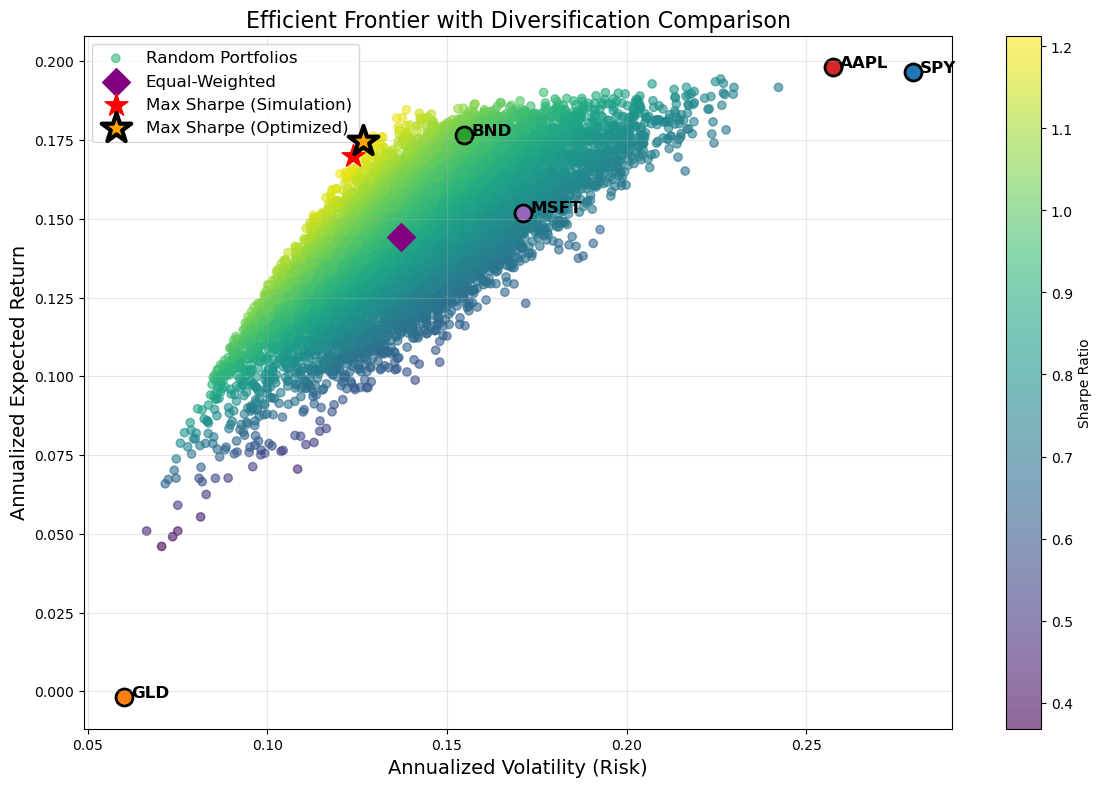


Congratulations! You've built a full quant portfolio optimizer.
You now clearly see how diversification dramatically improves risk-adjusted returns.


In [13]:
# Final Plot: Efficient Frontier with All Key Points
plt.figure(figsize=(14, 9))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', alpha=0.6, label='Random Portfolios')
plt.colorbar(label='Sharpe Ratio')

# Individual assets
for ticker, ret, vol, _ in individual_performance:
    plt.scatter(vol, ret, marker='o', s=150, edgecolors='black', linewidth=2)
    plt.text(vol+0.002, ret, ticker, fontsize=12, fontweight='bold')

# Equal-weighted
plt.scatter(eq_vol, eq_return, marker='D', color='purple', s=200, label='Equal-Weighted', zorder=5)

# Simulation highlights
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx],
            marker='*', color='red', s=300, label='Max Sharpe (Simulation)', zorder=5)

# Optimized
plt.scatter(opt_vol, opt_return, marker='*', color='orange', s=500,
            label='Max Sharpe (Optimized)', edgecolors='black', linewidth=3, zorder=6)

plt.xlabel('Annualized Volatility (Risk)', fontsize=14)
plt.ylabel('Annualized Expected Return', fontsize=14)
plt.title('Efficient Frontier with Diversification Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\nCongratulations! You've built a full quant portfolio optimizer.")
print("You now clearly see how diversification dramatically improves risk-adjusted returns.")

### Final Takeaway
The plot and table above show:
- Individual assets sit **inside** the frontier
- The optimized portfolio lies on the **top-left** edge — highest return per unit of risk
- Diversification (especially optimized) consistently beats single stocks

This is why professional investors never put all eggs in one basket.

**Try experimenting:**
- Change tickers or time period
- Allow short-selling (remove bounds)
- Use different risk-free rate

Happy investing and quant modeling!